Normalidade US:  0.039170969277620316
Normalidade CH:  0.0064009856432676315
Normalidade IN:  0.0026694410480558872
Normalidade RU:  0.15630054473876953
Homogeneidade:  0.05882275208770059


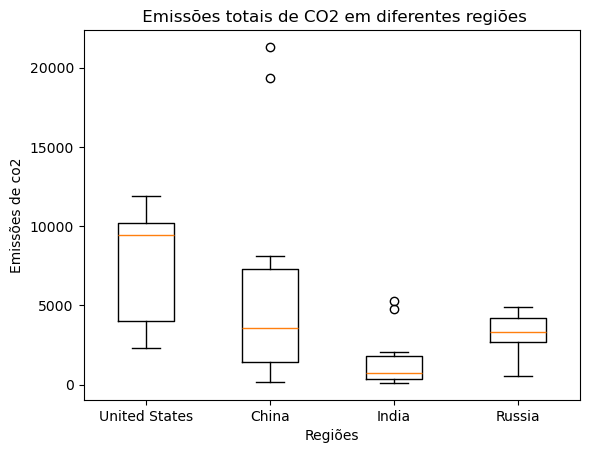

valor de prova do teste one-way ANOVA: 0.00631


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
dados = pd.read_csv("CO_data.csv" , delimiter=",")
dados.columns = ["country","year","population","gdp","cement_co2","co2","coal_co2","energy_per_capita","energy_per_gdp","flaring_co2","gas_co2","methane","nitrous_oxide","oil_co2"]

#Ex 3
years = pd.Series([i for i in range(1900,2021)]) 
seed_value = 55
np.random.seed(seed_value)
sampleyears2 = years.sample(n=12, replace=False) 
emissoes_totais_co2 = dados['cement_co2'] + dados['co2'] + dados['coal_co2'] + dados['flaring_co2'] + dados['gas_co2'] + dados['oil_co2']
dados.insert(14, "emissoes_totais_co2", emissoes_totais_co2)
paises = ['United States', 'China', 'India', 'European Union (27) (GCP)', 'Russia']
dados_us= dados.loc[(dados['year'].isin(sampleyears2)) & (dados['country'] == 'United States'), ['emissoes_totais_co2']].dropna()
dados_ch= dados.loc[(dados['year'].isin(sampleyears2)) & (dados['country'] == 'China'), ['emissoes_totais_co2']].dropna()
dados_in= dados.loc[(dados['year'].isin(sampleyears2)) & (dados['country'] == 'India'), ['emissoes_totais_co2']].dropna()
dados_ue= dados.loc[(dados['year'].isin(sampleyears2)) & (dados['country'] == 'European Union (27) (GCP)'), ['emissoes_totais_co2']].dropna()
dados_ru= dados.loc[(dados['year'].isin(sampleyears2)) & (dados['country'] == 'Russia'), ['emissoes_totais_co2']].dropna()

_, p_normal_us = stats.shapiro(dados_us)
_, p_normal_ch = stats.shapiro(dados_ch)
_, p_normal_in = stats.shapiro(dados_in)
#Iremos ignorar a de UE27 visto não existirem dados suficientes (nan)
#_, p_normal_ue = stats.shapiro(dados_ue)
_, p_normal_ru = stats.shapiro(dados_ru)
print("Normalidade US: ",p_normal_us)
print("Normalidade CH: ",p_normal_ch)
print("Normalidade IN: ",p_normal_in)
print("Normalidade RU: ",p_normal_ru)
# Verifica-se que apenas não existe normalidade nos dados da Rússia visto que o valor é maior que o da significância (0.05)

#Retiramos o valor da European Union 27 visto os valores serem nan
_, p_homogeneidade = stats.levene(dados_us['emissoes_totais_co2'],dados_ch['emissoes_totais_co2'],dados_in['emissoes_totais_co2'],dados_ru['emissoes_totais_co2'])
print("Homogeneidade: ",p_homogeneidade)

plt.boxplot([dados_us['emissoes_totais_co2'],dados_ch['emissoes_totais_co2'],dados_in['emissoes_totais_co2'],dados_ru['emissoes_totais_co2']], labels=['United States', 'China', 'India','Russia'])
plt.title(' Emissões totais de CO2 em diferentes regiões')
plt.xlabel('Regiões')
plt.ylabel('Emissões de co2')                        
plt.show()

#Com um grau de significância de 5% verifica-se a homogeneidade nos dados.
_,p_value=stats.f_oneway(dados_us['emissoes_totais_co2'],dados_ch['emissoes_totais_co2'],dados_in['emissoes_totais_co2'],dados_ru['emissoes_totais_co2'])
print('valor de prova do teste one-way ANOVA:',round(p_value,5))

#Não podemos rejeitar o valor da hipótese nula porque p-value > 0.05